In [ ]:
from google.colab import drive

In [ ]:
#drive.mount('/content/drive')

In [ ]:
#!unzip "/content/drive/MyDrive/house_price.zip"

In [ ]:
import regex as re
import nltk
import seaborn as sns
from scipy.sparse import hstack, csr_matrix
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as MSE, r2_score
from scipy.stats import skew,kurtosis,zscore
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Data/Train.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
#df = df[df['price'] <= 3500]

In [ ]:
def distribution_check(df,Cols):
    plt.figure(figsize=(12,7))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


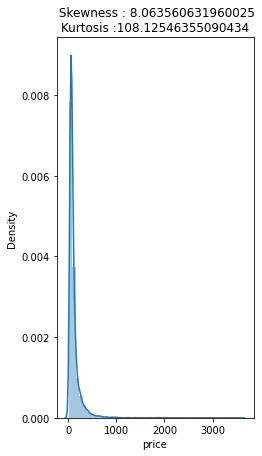

In [ ]:
distribution_check(df,['price'])

In [ ]:
df['price'] = np.log(df['price'])
y = df['price']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


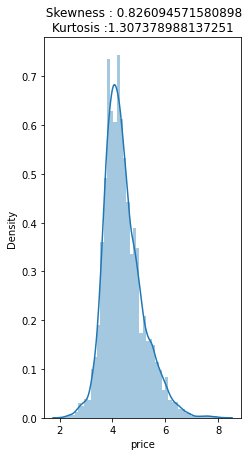

In [ ]:
distribution_check(df,['price'])

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df['society'].fillna('missingsociety', inplace=True)
df['area_type'].fillna('missingsarea', inplace=True)
df['location'].fillna('missinglocation', inplace=True)
df = df.fillna(0)
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,3.665355
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,4.787492
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,missingsociety,1440,2.0,3.0,4.127134


In [ ]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: x.split('-')[0])

In [ ]:
df['size'] = df['size'].apply(str)
df['size'] = df['size'].apply(lambda x: x.split(' ')[0])

In [ ]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
df['total_sqft']=df['total_sqft'].apply(lambda x: find_number(x))
df['total_sqft'] = df['total_sqft'].apply(lambda x: x.split(' ')[0])

In [ ]:
df_num = df[['bath','balcony','size','total_sqft']]
df_num.head(3)

,bath,balcony,size,total_sqft
0,2.0,1.0,2,1056
1,5.0,3.0,4,2600
2,2.0,3.0,3,1440


In [ ]:
df_txt = df.drop(['bath','balcony','price','size','total_sqft'],1)
df_txt.head(2)

,area_type,availability,location,society
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp


In [ ]:
y =df.price

In [ ]:
df_txt['main'] = df_txt[df_txt.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

df_txt.main.head(3)

0    Super built-up  Area,19-Dec,Electronic City Ph...
1    Plot  Area,Ready To Move,Chikka Tirupathi,Theanmp
2    Built-up  Area,Ready To Move,Uttarahalli,missi...
Name: main, dtype: object

In [ ]:
X_text = df_txt.main
X_text.head(2)

0    Super built-up  Area,19-Dec,Electronic City Ph...
1    Plot  Area,Ready To Move,Chikka Tirupathi,Theanmp
Name: main, dtype: object

In [ ]:
import regex as re
model = []
for i in range(0, df.shape[0]):
    data = re.sub(r'\W', ' ', str(X_text[i]))
    data = data.lower()
    data = re.sub(r'\s+[a-z]\s+', ' ',data)
    data = re.sub(r'\s+', ' ', data)
    model.append(data)   

In [ ]:
model[0]

'super built up area 19 dec electronic city phase ii coomee '

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
vector = TfidfVectorizer(max_features = 2000, min_df = 1, max_df = 0.99, stop_words = stopwords.words('english'))
X_text = vector.fit_transform(model).toarray()

In [ ]:
X_text.shape[1]

2000

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_num = scaler.fit_transform(df_num,1)
df_num

array([[0.05      , 0.33333333, 0.04651163, 0.02018328],
       [0.125     , 1.        , 0.09302326, 0.04972164],
       [0.05      , 1.        , 0.06976744, 0.02752961],
       ...,
       [0.05      , 0.33333333, 0.04651163, 0.02180942],
       [0.1       , 0.33333333, 0.09302326, 0.08968644],
       [0.025     , 0.33333333, 0.02325581, 0.01050296]])

In [ ]:
X_num = df_num

In [ ]:
X = np.concatenate((X_text,X_num),axis = 1)
X

array([[0.        , 0.        , 0.        , ..., 0.33333333, 0.04651163,
        0.02018328],
       [0.        , 0.        , 0.        , ..., 1.        , 0.09302326,
        0.04972164],
       [0.        , 0.        , 0.        , ..., 1.        , 0.06976744,
        0.02752961],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.04651163,
        0.02180942],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.09302326,
        0.08968644],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.02325581,
        0.01050296]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

### Linear Regression

In [ ]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression().fit(X_train, y_train)

In [ ]:
#r_sq = model.score(X_train, y_train)
#print('coefficient of determination:', r_sq)

In [ ]:
#model.intercept_

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 100, verbose = 2)

In [ ]:
regr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.9s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=2, warm_start=False)

In [ ]:
import numpy as np

pred1 = regr.predict(X_test) 
rmse = np.sqrt(MSE(y_test, pred1)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.315958


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
r2_score(y_test,pred1)*100

81.69525619936098

In [ ]:
import lightgbm as lgb
train = lgb.Dataset(X_train, label=y_train)
test = lgb.Dataset(X_test, label=y_test)

In [ ]:
param = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
   'num_iterations': 100,
         'learning_rate': 0.13,  
         'num_leaves': 65,
         'max_depth': 60, 
         'min_data_in_leaf': 1, 
         'max_bin': 35, 
         'min_data_in_bin':10, 
         'random_state' : 42 
}

In [ ]:
gbm = lgb.LGBMRegressor(**param)

In [ ]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds = 100)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.515865	valid_0's auc: 1	valid_0's l2: 0.448149
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 0.469204	valid_0's auc: 1	valid_0's l2: 0.374744
[3]	valid_0's l1: 0.429939	valid_0's auc: 1	valid_0's l2: 0.318477
[4]	valid_0's l1: 0.396362	valid_0's auc: 1	valid_0's l2: 0.273407
[5]	valid_0's l1: 0.369482	valid_0's auc: 1	valid_0's l2: 0.240897
[6]	valid_0's l1: 0.34762	valid_0's auc: 1	valid_0's l2: 0.214914
[7]	valid_0's l1: 0.330532	valid_0's auc: 1	valid_0's l2: 0.195744
[8]	valid_0's l1: 0.316793	valid_0's auc: 1	valid_0's l2: 0.180741
[9]	valid_0's l1: 0.305676	valid_0's auc: 1	valid_0's l2: 0.168821
[10]	valid_0's l1: 0.295797	valid_0's auc: 1	valid_0's l2: 0.158333
[11]	valid_0's l1: 0.287411	valid_0's auc: 1	valid_0's l2: 0.149827
[12]	valid_0's l1: 0.281541	valid_0's auc: 1	valid_0's l2: 0.143938
[13]	valid_0's l1: 0.276047	valid_0's auc: 1	valid_0's l2: 0.138212
[14]	valid_0's l1: 0.270177	valid_0's auc: 1	valid_0's l2: 0.13

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.13, max_bin=35,
              max_depth=60, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_data_in_bin=10, min_data_in_leaf=1,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_iterations=100, num_leaves=65, objective='regression',
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              task='train')

In [ ]:
pred1 = gbm.predict(X_test, num_iteration=gbm.best_iteration_) 
rmse = np.sqrt(MSE(y_test, pred1)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.285233


In [ ]:
r2_score(y_test,pred1)*100

85.08214986734338

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth = 25, 
                   learning_rate = 0.1, 
                   n_estimators = 100, 
                   silent = False, 
                   objective = 'reg:squarederror', 
                   booster = 'gbtree', 
                   n_jobs = 4, 
                   nthread = None, 
                   gamma = 0, 
                   min_child_weight = 1, 
                   max_delta_step = 0, 
                   subsample = 1, 
                   colsample_bytree = 1, 
                   colsample_bylevel = 1, 
                   reg_alpha = 0.95, 
                   reg_lambda = 1, 
                   scale_pos_weight = 1, 
                   base_score = 0.7, 
                   random_state = 42, 
                   verbose = 2,
                   seed=None)
xgb.fit(X_train, y_train)
y_pred3 = xgb.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
r2_score(y_test,y_pred3)*100

NameError: ignored

Test Set

In [ ]:
df = pd.read_csv("/content/Data/Test.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [ ]:
df['society'].fillna('missingsociety', inplace=True)
df['area_type'].fillna('missingsarea', inplace=True)
df['location'].fillna('missinglocation', inplace=True)
df = df.fillna(0)
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,0.0
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,missingsociety,2400,9.0,2.0,0.0
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,0.0


In [ ]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: x.split('-')[0])

In [ ]:
df['size'] = df['size'].apply(str)
df['size'] = df['size'].apply(lambda x: x.split(' ')[0])

In [ ]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
df['total_sqft']=df['total_sqft'].apply(lambda x: find_number(x))
df['total_sqft'] = df['total_sqft'].apply(lambda x: x.split(' ')[0])

In [ ]:
df_num = df[['bath','balcony','size','total_sqft']]
df_num.head(3)

,bath,balcony,size,total_sqft
0,2.0,2.0,2,1225
1,9.0,2.0,9,2400
2,5.0,2.0,4,1650


In [ ]:
df_txt = df.drop(['bath','balcony','price','size','total_sqft'],1)
df_txt.head(2)

,area_type,availability,location,society
0,Super built-up Area,Ready To Move,Brookefield,Roeekbl
1,Plot Area,Ready To Move,Akshaya Nagar,missingsociety


In [ ]:
df_txt['main'] = df_txt[df_txt.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

df_txt.main.head(3)

0    Super built-up  Area,Ready To Move,Brookefield...
1    Plot  Area,Ready To Move,Akshaya Nagar,missing...
2                Plot  Area,18-Apr,Hennur Road,Saandtt
Name: main, dtype: object

In [ ]:
X_text = df_txt.main
X_text.head(2)

0    Super built-up  Area,Ready To Move,Brookefield...
1    Plot  Area,Ready To Move,Akshaya Nagar,missing...
Name: main, dtype: object

In [ ]:
import regex as re
model = []
for i in range(0, df.shape[0]):
    data = re.sub(r'\W', ' ', str(X_text[i]))
    data = data.lower()
    data = re.sub(r'^br$', ' ', data)
    data = re.sub(r'\s+br\s+',' ',data)
    data = re.sub(r'\s+[a-z]\s+', ' ',data)
    data = re.sub(r'^b\s+', '', data)
    data = re.sub(r'\s+', ' ', data)
    model.append(data)   

In [ ]:
X_text = vector.transform(model).toarray()

In [ ]:
df_num = scaler.transform(df_num)
df_num

array([[0.05      , 0.66666667, 0.04651163, 0.02341643],
       [0.225     , 0.66666667, 0.20930233, 0.04589543],
       [0.125     , 0.66666667, 0.09302326, 0.03154713],
       ...,
       [0.05      , 0.66666667, 0.04651163, 0.02324425],
       [0.05      , 0.33333333, 0.04651163, 0.01903541],
       [0.05      , 0.66666667, 0.04651163, 0.0219816 ]])

In [ ]:
X_num = df_num

In [ ]:
X = np.concatenate((X_text,X_num),axis = 1)
X

array([[0.        , 0.        , 0.        , ..., 0.66666667, 0.04651163,
        0.02341643],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.20930233,
        0.04589543],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.09302326,
        0.03154713],
       ...,
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.04651163,
        0.02324425],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.04651163,
        0.01903541],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.04651163,
        0.0219816 ]])

In [ ]:
predictions = gbm.predict(X)

In [ ]:
predictions

array([4.16691752, 5.72974085, 5.31743759, ..., 3.81534899, 4.04312612,
       4.0818126 ])

In [ ]:
predictions = np.exp(predictions)
predictions

array([ 64.51627489, 307.88946837, 203.86083741, ...,  45.39259504,
        57.00426686,  59.25277443])

In [ ]:
df_sub = pd.DataFrame(data = predictions, columns=['price'])

In [ ]:
df_sub.to_csv('result.csv')